# Regresión Lineal

#### Autor: Emilio Martínez Miranda

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes


In [2]:
diabetes = load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [3]:
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [4]:
df_target = pd.DataFrame(data=diabetes.target, columns=['target'])
df_target.head(3)

,target
0,151.0
1,75.0
2,141.0


### Modelo Simple de una variable

Error cuadrático medio (MSE): 4150.68
r2: 0.19
pendiente: [[981.65543614]]
intercepto: [152.28824927]


Text(0, 0.5, 'disease progression')

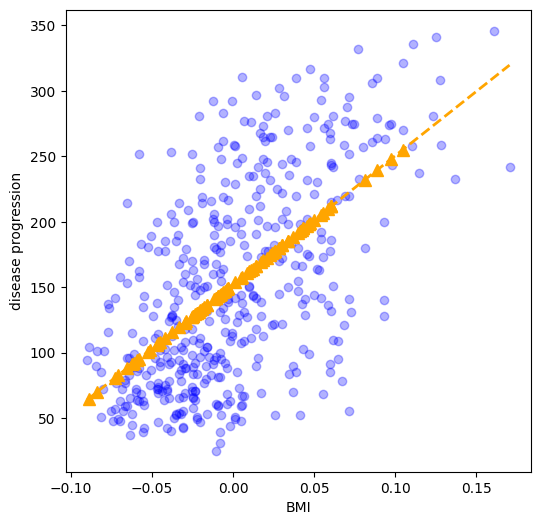

In [5]:
# Definir nuestras variables dependiente e independiente(s)
X = df[['bmi']]
y = df_target

# Separar los datos en muestras de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Construir modelo de regresión lineal
modelo_regresion_simple = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo_regresion_simple.fit(X_train, y_train)

# Predecir los valores de la variable objetivo (y) para los datos de prueba
y_pred = modelo_regresion_simple.predict(X_test)

# Calcular el error cuadrático medio (MSE) de las predicciones
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir el MSE
print('Error cuadrático medio (MSE): {:.2f}'.format(mse))
print('r2: {:.2f}'.format(r2))

print('pendiente:', modelo_regresion_simple.coef_)
print('intercepto:', modelo_regresion_simple.intercept_)

m = modelo_regresion_simple.coef_
b = modelo_regresion_simple.intercept_
z = np.linspace(X.min(), X.max(), 100)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(X.values, y.values, 'ob', alpha=0.3)
ax.plot(z, m*z + b, ls='--', color='orange', lw=2)
plt.plot(X_test.values, y_pred, '^', color='orange', ms=8)
ax.set_xlabel('BMI')
ax.set_ylabel('disease progression')


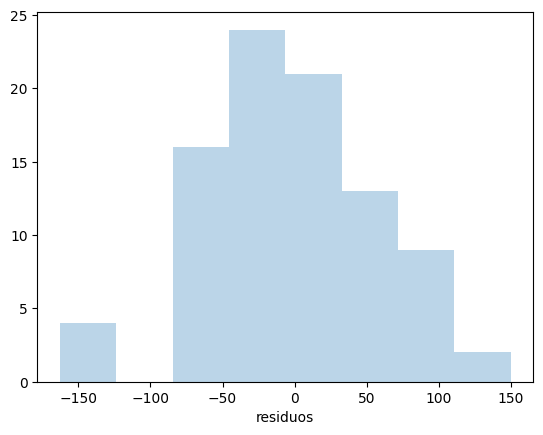

In [8]:
# Distribución de los residuos (valor verdadero - predicción)

plt.hist(y_test.values - y_pred, bins=8, alpha=0.3)
plt.xlabel('residuos');

In [10]:
import statsmodels.api as sm

X = df[['bmi']]
y = df_target

X = sm.add_constant(X) # añadir constante para calcular intercepto

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = sm.OLS(y_train, X_train).fit()
y_pred = model.predict(X_test) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     211.2
Date:                Thu, 11 May 2023   Prob (F-statistic):           8.70e-38
Time:                        14:26:02   Log-Likelihood:                -1957.0
No. Observations:                 353   AIC:                             3918.
Df Residuals:                     351   BIC:                             3926.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.2882      3.303     46.111      0.0

In [11]:
print('Parameters: ', model.params)
print('Standard errors: ', model.bse)

Parameters:  const    152.288249
bmi      981.655436
dtype: float64
Standard errors:  const     3.302676
bmi      67.553156
dtype: float64


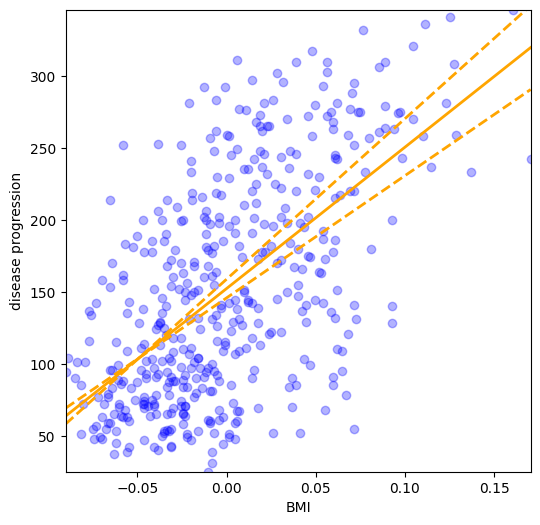

In [12]:
z = np.linspace(X.min(), X.max(), 100)
m = model.params.bmi
b = model.params.const

## Intervalo de confianza
conf_int = model.conf_int()

m_low = conf_int[0]['bmi']
m_up = conf_int[1]['bmi']
b_low = conf_int[0]['const']
b_up = conf_int[1]['const']

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(X['bmi'], y['target'], 'ob', alpha=0.3)
ax.plot(z, m*z + b, ls='-', color='orange', lw=2)
ax.plot(z, m_low*z + b_low, ls='--', color='orange', lw=2)
ax.plot(z, m_up*z + b_up, ls='--', color='orange', lw=2)
ax.set_xlabel('BMI')
ax.set_ylabel('disease progression')
ax.set_xlim(X['bmi'].min(), X['bmi'].max())
ax.set_ylim(y['target'].min(), y['target'].max())
plt.show()

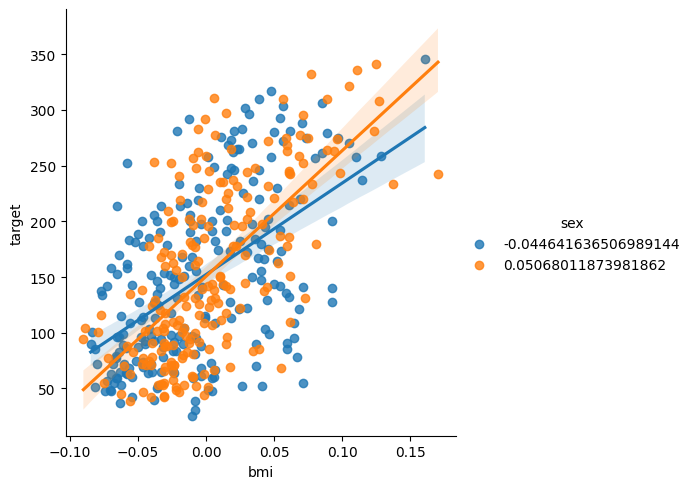

In [54]:
# misma gráfica de intervalos de confianza con sns.lmplot 
# también se puede con displot

sns.lmplot(df_completo, x='bmi', y='target', hue='sex')
plt.show()

### Modelo Lineal con dos variables

### Ejercicio

Construir modelo de dos variables y graficar

Error cuadrático medio (MSE): 3701.79
r2: 0.28
pendiente: [[830.49125684 384.39276869]]
intercepto: [152.43720703]


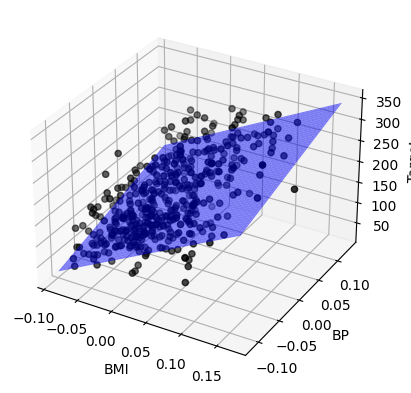

In [6]:
X = df[['bmi','bp']]
y = df_target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

modelo_regresion_dosvar = LinearRegression()
modelo_regresion_dosvar.fit(X_train, y_train)
y_pred = modelo_regresion_dosvar.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Error cuadrático medio (MSE): {:.2f}'.format(mse))
print('r2: {:.2f}'.format(r2))

print('pendiente:', modelo_regresion_dosvar.coef_)
print('intercepto:', modelo_regresion_dosvar.intercept_)

m = modelo_regresion_dosvar.coef_
b = modelo_regresion_dosvar.intercept_
#z = np.linspace(X.min(), X.max(), 100)

# Gráfica 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xx = df['bmi']
yy = df['bp']
z = df_target

# nube de puntos
ax.scatter(xx, yy, z, color='k')

# meshgrids para plano de regresión
XX, YY = np.meshgrid(np.linspace(xx.min(), xx.max(), 100), np.linspace(yy.min(), yy.max(), 100))
Z = m[0][0]*XX + m[0][1]*YY + b

# plano
ax.plot_surface(XX, YY, Z, alpha=0.5, color='b')

ax.set_xlabel('BMI')
ax.set_ylabel('BP')
ax.set_zlabel('Target')
plt.show()


Otra forma de hacerlo

In [34]:
X = df[['bmi', 'bp']]
y = df_target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

modelo_2var = LinearRegression()

modelo_2var.fit(X_train, y_train)

y_pred = modelo_2var.predict(X_test)

print('coeficientes:', modelo_2var.coef_)
print('intercepto:', modelo_2var.intercept_)

coeficientes: [[830.49125684 384.39276869]]
intercepto: [152.43720703]


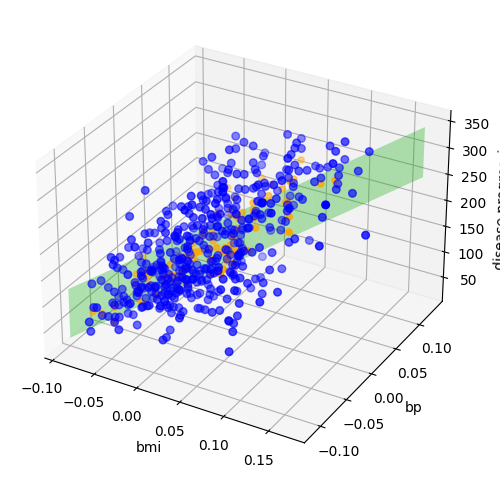

In [35]:
bmi = X['bmi']
bp = X['bp']
target = y

def plano(x1, x2):
    m1 = modelo_2var.coef_[0][0]
    m2 = modelo_2var.coef_[0][1]
    b = modelo_2var.intercept_[0]
    return m1*x1 + m2*x2 + b

X1 = np.linspace(np.min(bmi), np.max(bmi), 20)
X2 = np.linspace(np.min(bp), np.max(bp), 20)

x1grid, x2grid = np.meshgrid(X1, X2)
Z = plano(x1grid, x2grid)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X1, X2, Z, linewidth=1, color='lime', alpha=0.3)
ax.scatter(bmi, bp, target, marker='o', s=30, color = 'b')
ax.scatter(X_test['bmi'], X_test['bp'], y_pred, '^', color='orange')
ax.set_xlabel('bmi')
ax.set_ylabel('bp')
ax.set_zlabel('disease progression')
#ax.view_init(0, 45)
plt.show()

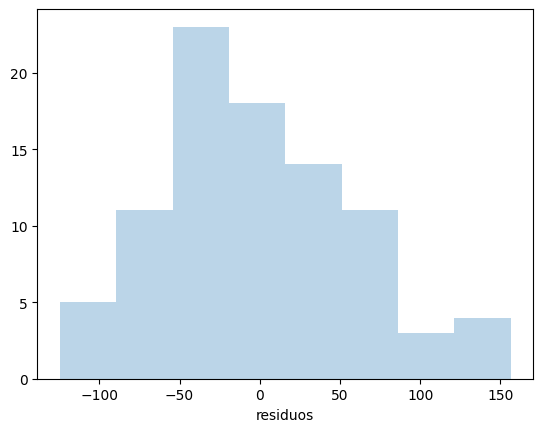

In [36]:
plt.hist(y_test.values - y_pred, bins=8, alpha=0.3)
plt.xlabel('residuos');

### Modelo lineal con múltiples variables

Error cuadrático medio (MSE): 3424.26
r2: 0.33


Text(0, 0.5, 'disease progression')

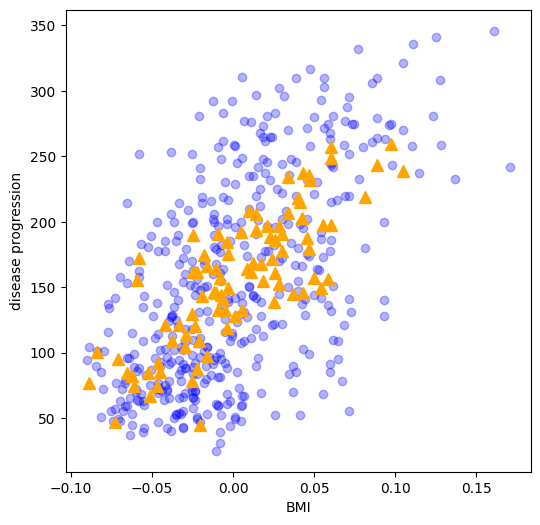

In [7]:
X = df
y = df_target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

modelo_regresion_multiple = LinearRegression()

modelo_regresion_multiple.fit(X_train, y_train)

y_pred = modelo_regresion_multiple.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Error cuadrático medio (MSE): {:.2f}'.format(mse))
print('r2: {:.2f}'.format(r2))

fig, ax = plt.subplots(figsize=(6,6))

ax.plot(X['bmi'].values, y.values, 'ob', alpha=0.3)
plt.plot(X_test['bmi'].values, y_pred, '^', color='orange', ms=8)
ax.set_xlabel('BMI')
ax.set_ylabel('disease progression')

In [26]:
X = df
y = df_target

X = sm.add_constant(X) # añadir constante para calcular intercepto

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = sm.OLS(y_train, X_train).fit()
y_pred = model.predict(X_test) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     42.47
Date:                Thu, 11 May 2023   Prob (F-statistic):           4.05e-54
Time:                        14:34:14   Log-Likelihood:                -1897.7
No. Observations:                 353   AIC:                             3817.
Df Residuals:                     342   BIC:                             3860.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.5380      2.836     53.789      0.0

* Hipótesis nula: la variable independiente NO tiene influencia en la variable dependiente

In [27]:
X = df
y = df_target
df_completo = X
df_completo['target'] = y['target']

df_completo.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0


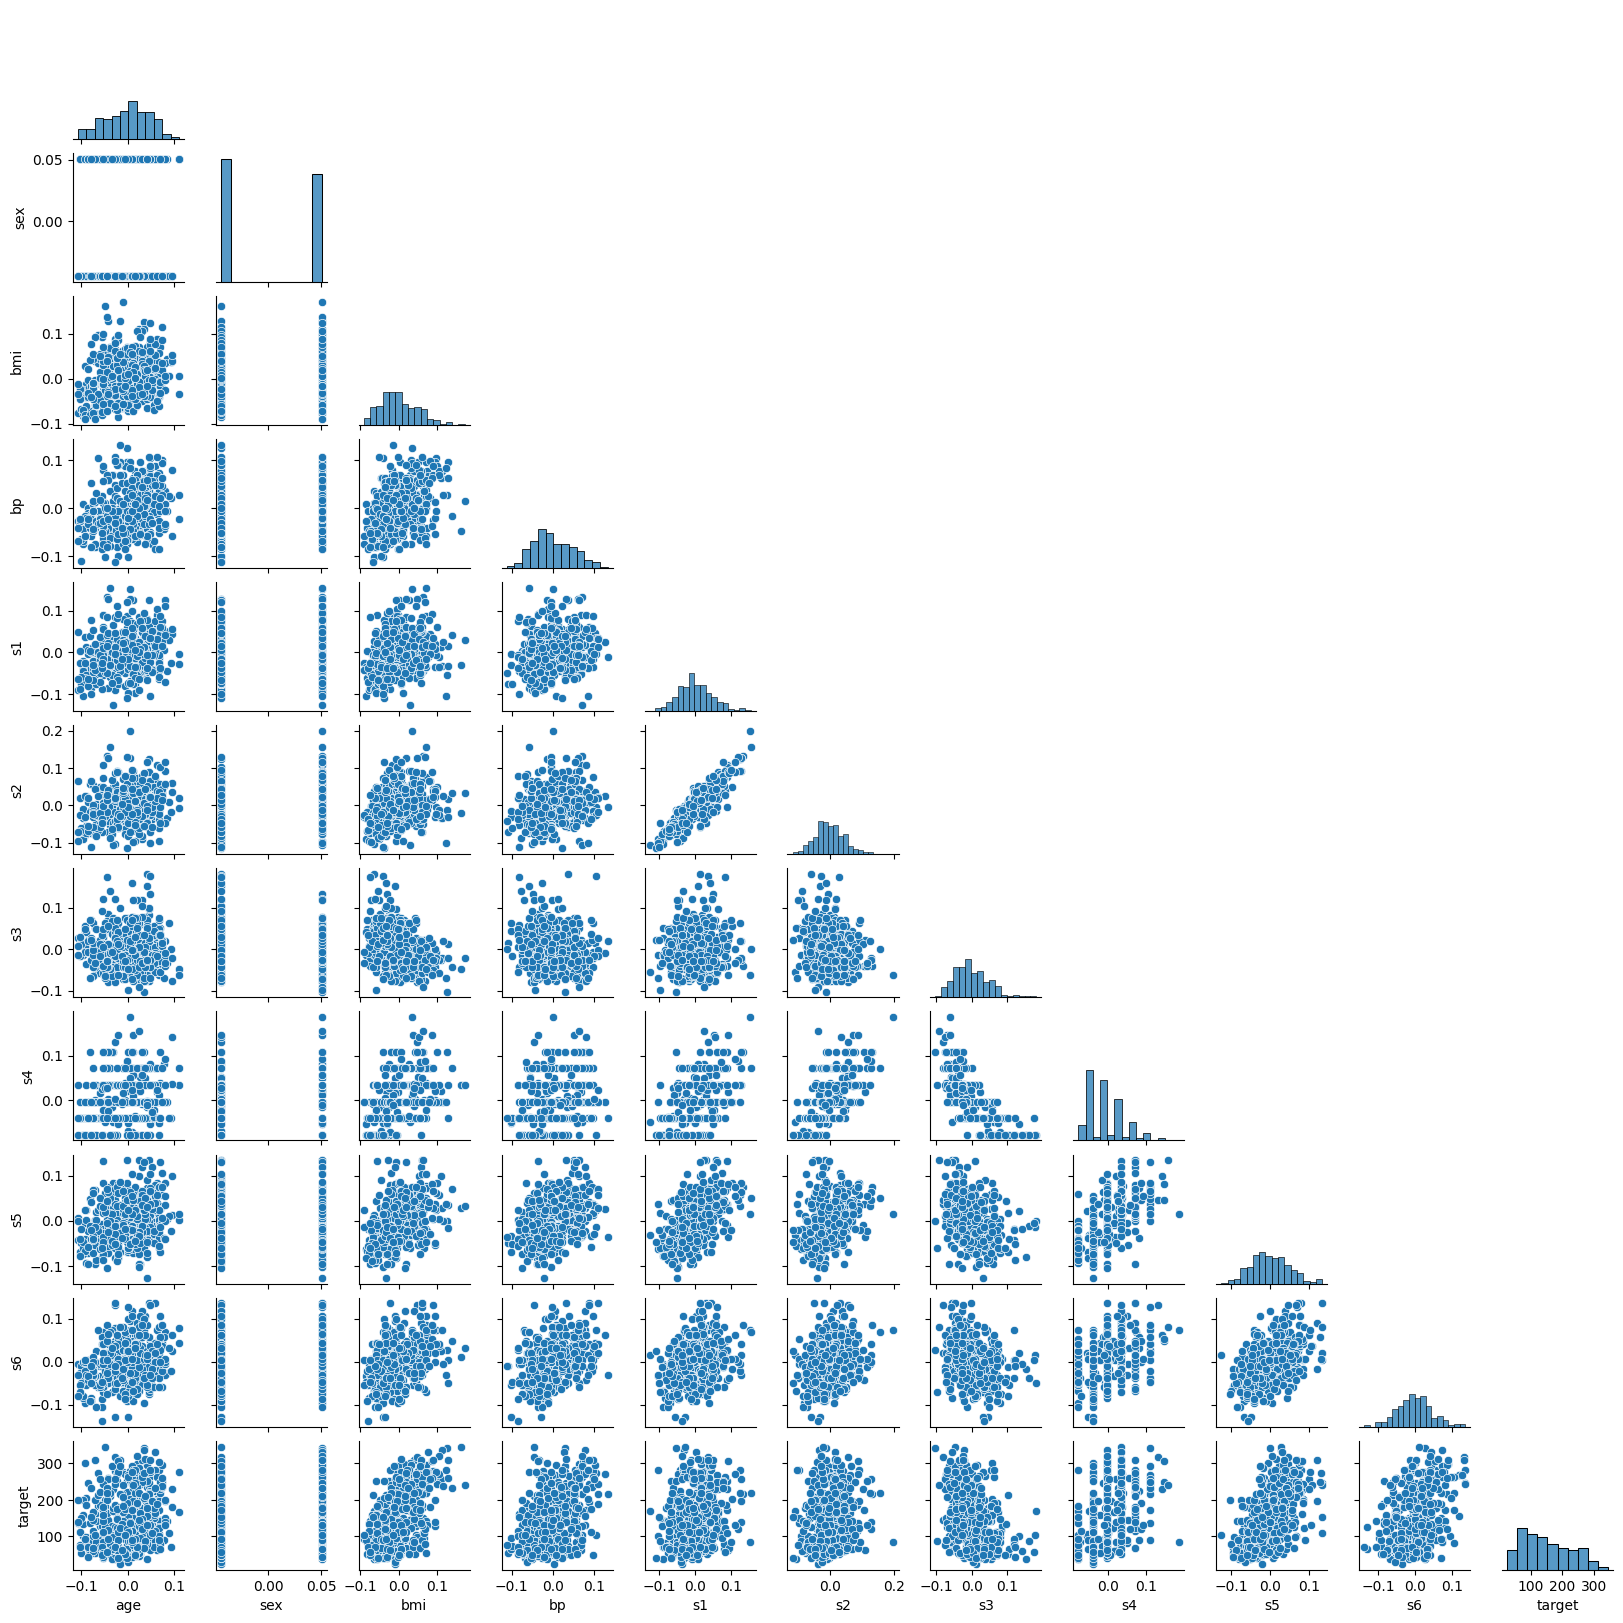

In [37]:
sns.pairplot(df_completo, height=1.5, corner=True)
plt.show()

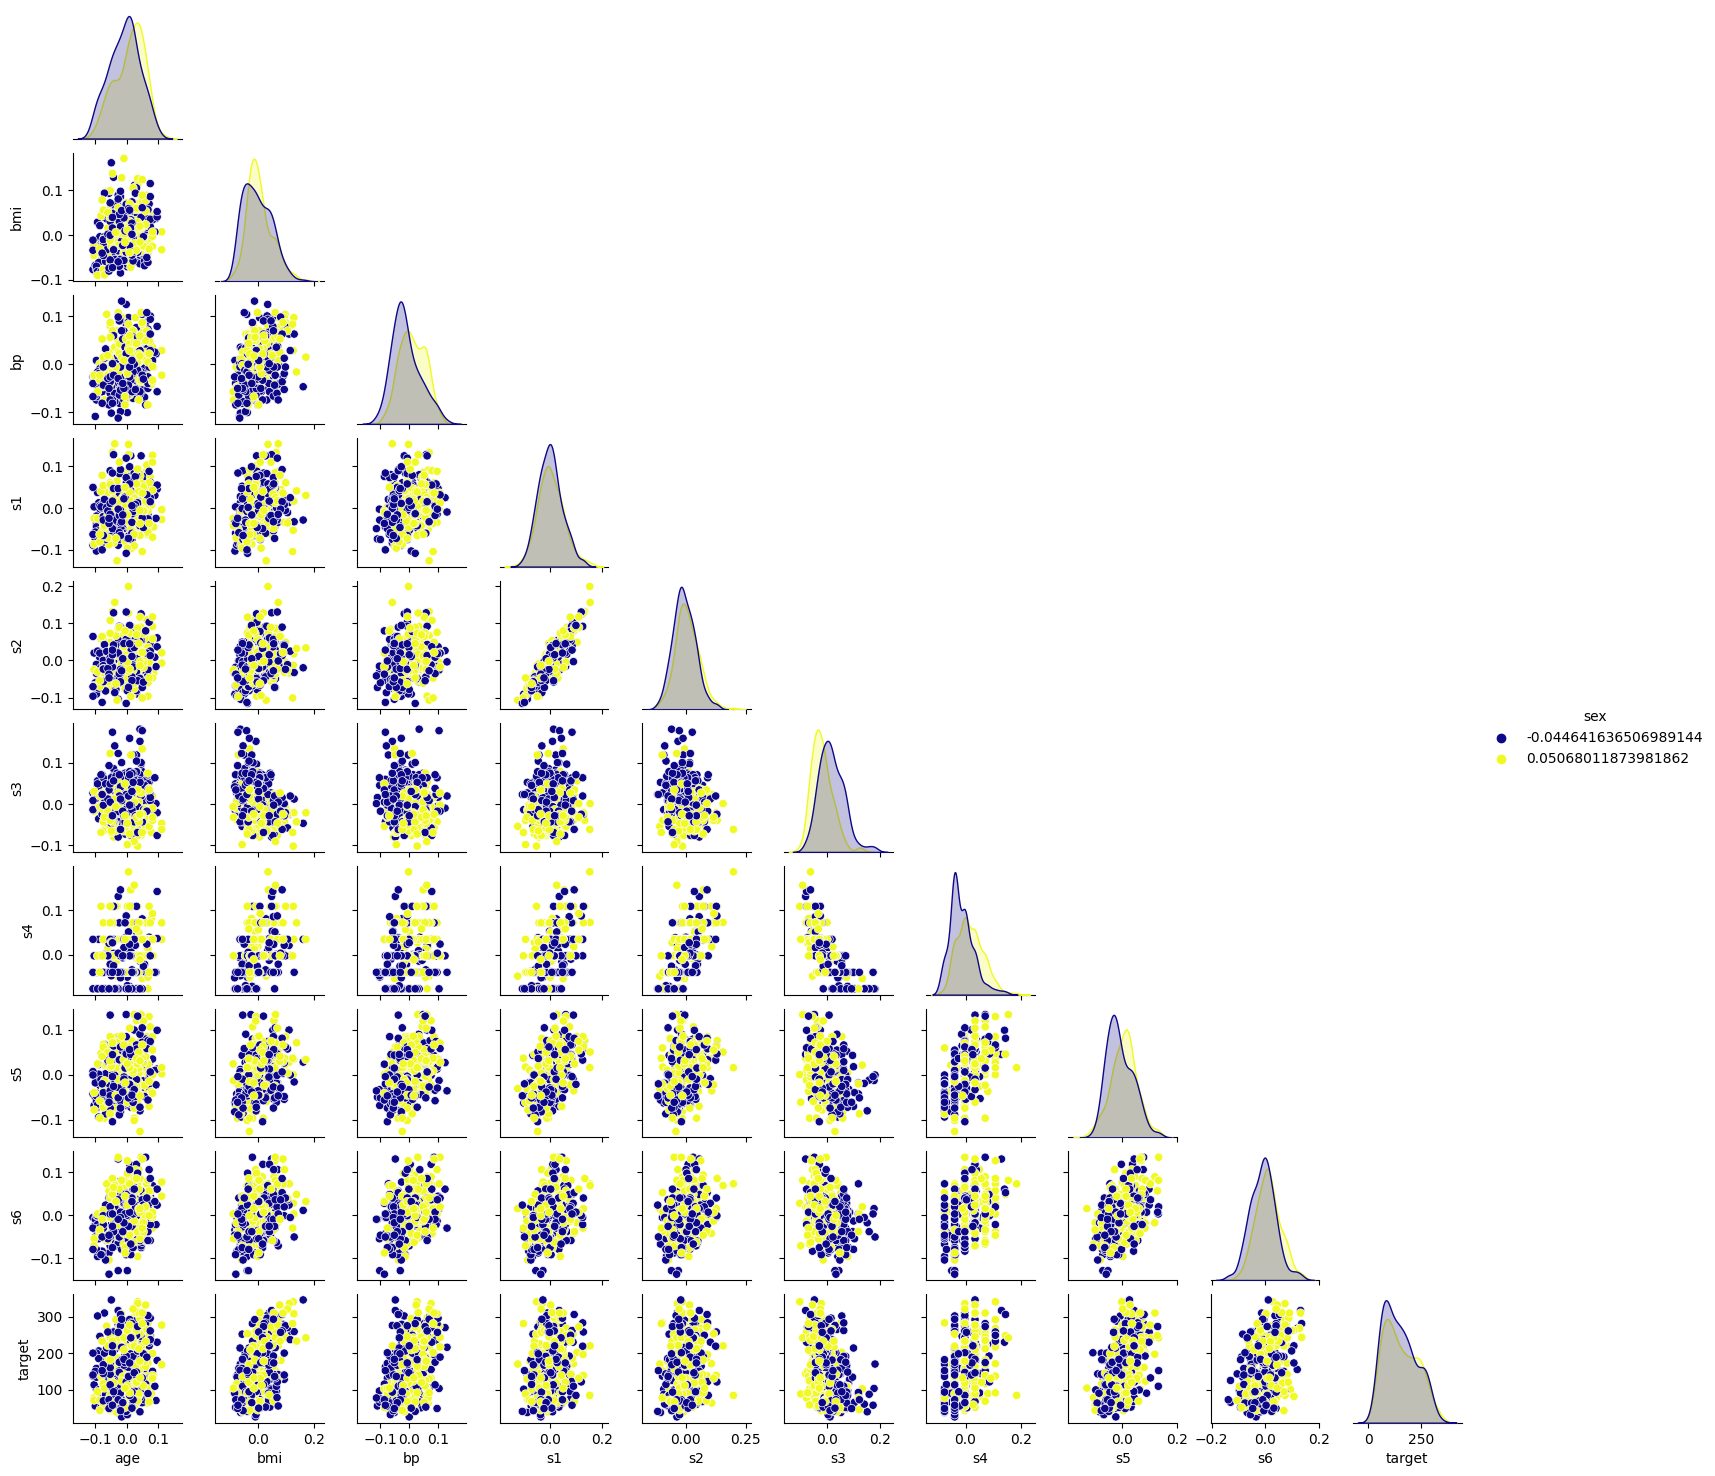

In [38]:
sns.pairplot(df_completo, hue='sex',height=1.5, palette='plasma', corner = True)
plt.show()

### Validación cruzada

In [31]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(modelo_regresion_multiple, X, y, cv=5)

# imprimir los scores de cada fold
print('Scores de cada fold:', scores)

# imprimir el promedio de los scores
print('Score promedio:', scores.mean())

Scores de cada fold: [1. 1. 1. 1. 1.]
Score promedio: 1.0


### Regresión polinomial

In [32]:
from sklearn.preprocessing import PolynomialFeatures

X = df[['s3']]
y = df_target

poly_grado2 = PolynomialFeatures(degree=2)
X_poly = poly_grado2.fit_transform(X)

#X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)
reg_poly = LinearRegression()
reg_poly.fit(X_poly, y)

y_pred = reg_poly.predict(X_poly)

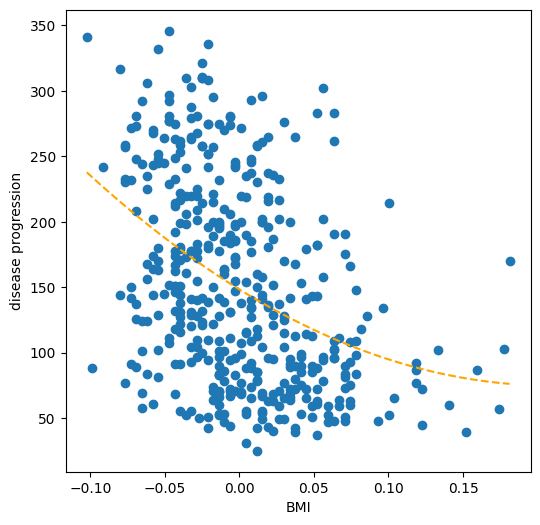

In [33]:
# [1, a, b, a^2, ab, b^2] -> 2 variables
# [1, a, a^2] -> 1 variable

a1 = reg_poly.coef_[0][1]
a2 = reg_poly.coef_[0][2]
b = reg_poly.intercept_[0]
z = np.linspace(X.min(), X.max(), 100)

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X, y)
ax.plot(z, a1*z + a2*z**2 +b, color='orange', ls='--')
ax.set_xlabel('BMI')
ax.set_ylabel('disease progression')
plt.show()

### Ejercicio

Dividir el dataset por sexo

In [46]:
df_h = df_completo[df_completo['sex']<0]

df_m = df_completo[df_completo['sex']>0]

In [44]:
df_h.head(4)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,97.0


In [45]:
df_m.head(4)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.05068,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
2,0.085299,0.05068,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
6,-0.045472,0.05068,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,138.0
7,0.063504,0.05068,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,63.0


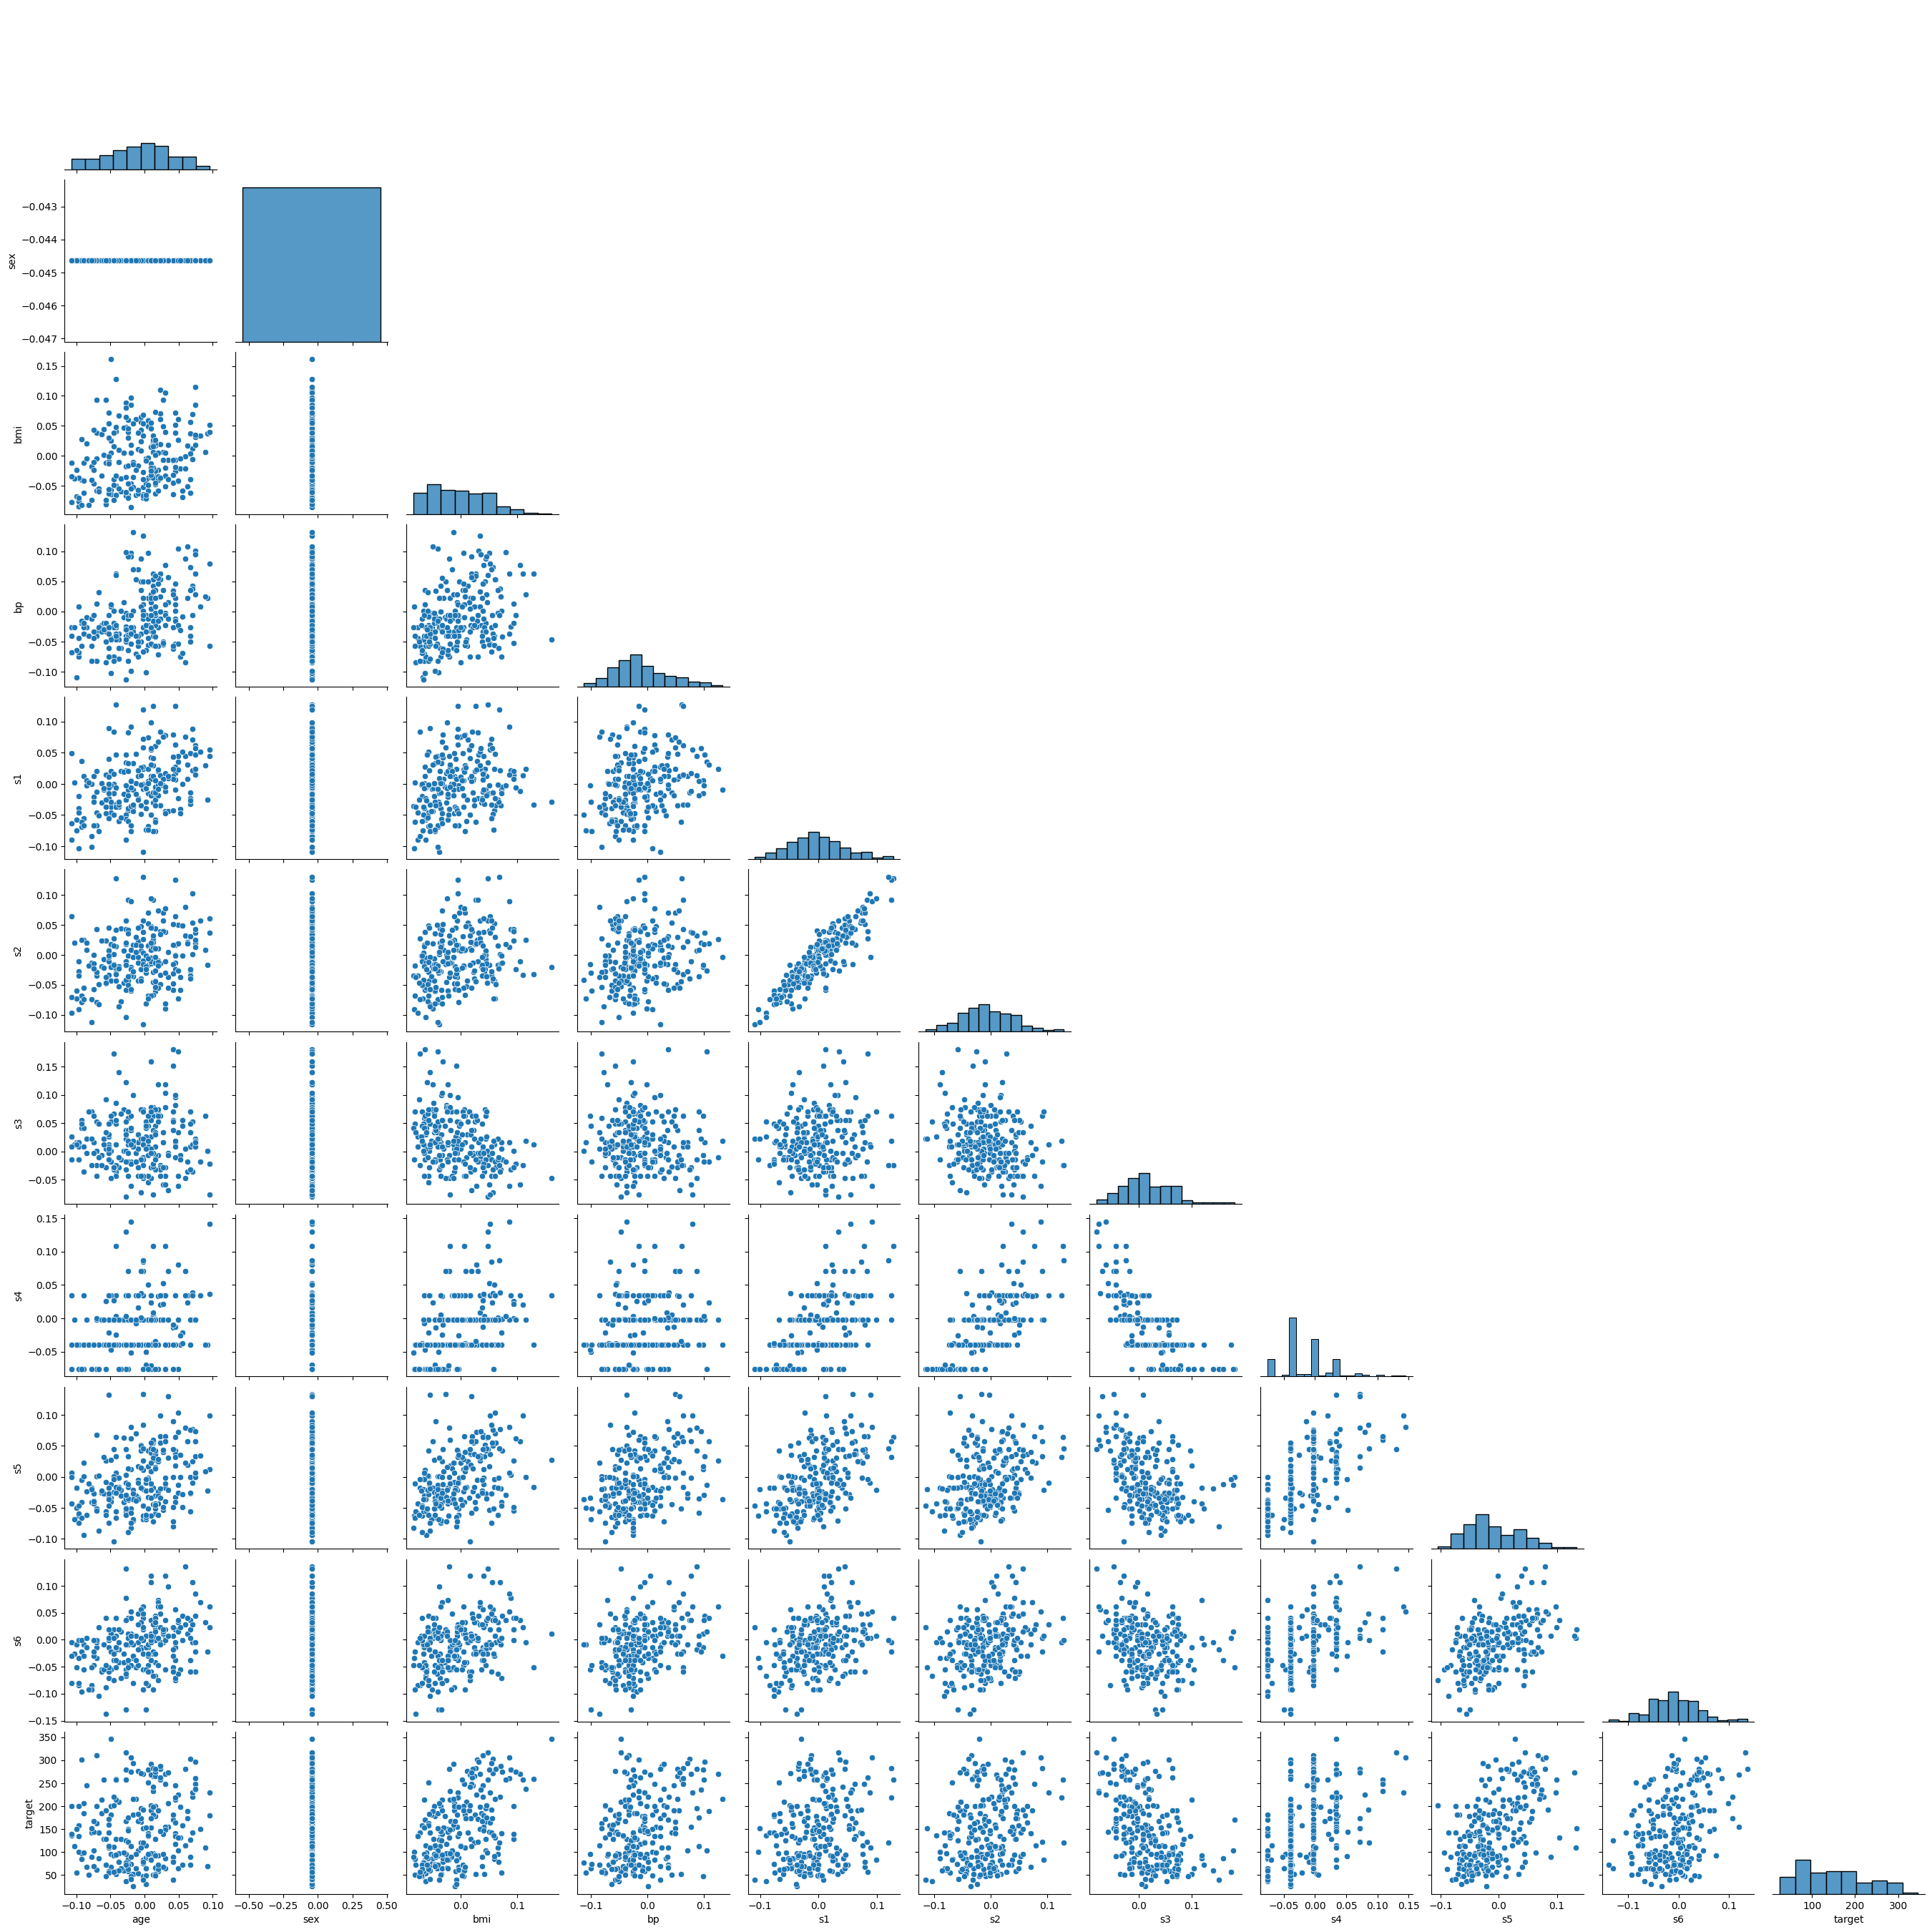

In [47]:
sns.pairplot(df_h, corner=True)
plt.show()

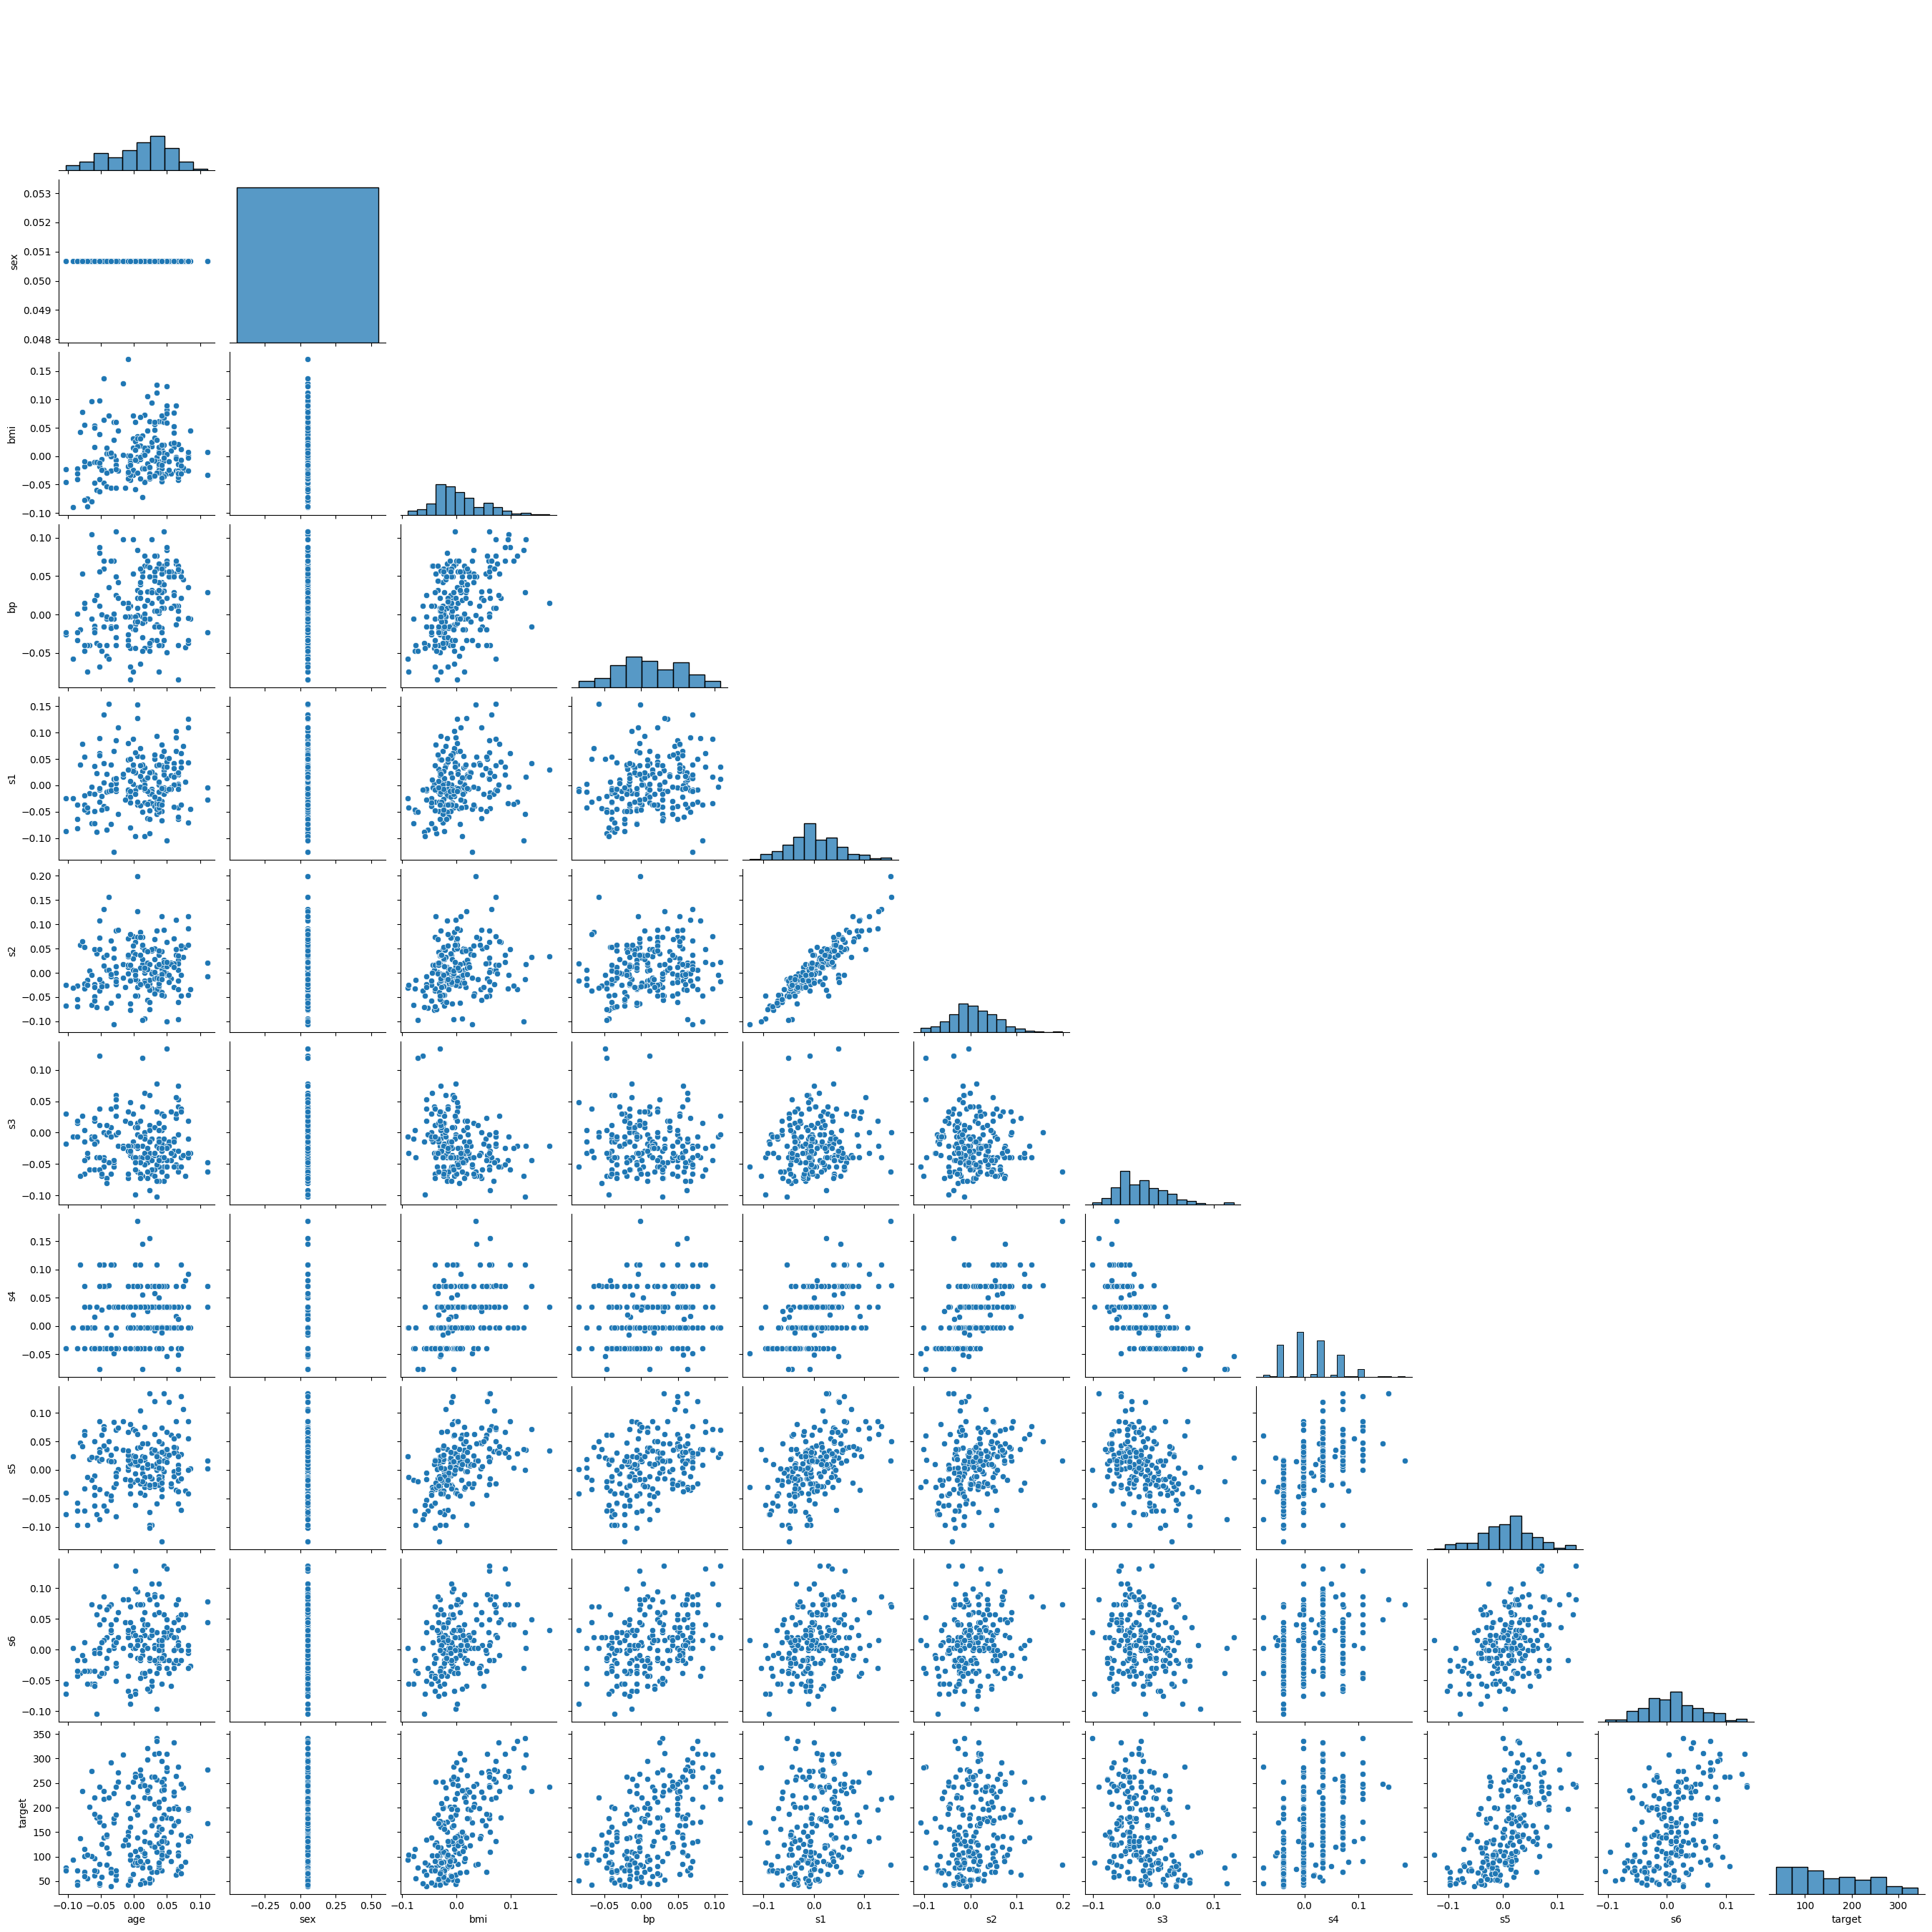

In [51]:
sns.pairplot(df_m, corner=True)
plt.show()